In [3]:
# 퍼셉트론을 활용하여 XOR 게이트 구현 (AND, OR, NAND 퍼셉트론 활용)

import numpy as np

# step function
def step_func(t):
    if t > 0 :  return 1
    else :      return 0

# 퍼셉트론 학습
def perceptron_fit(X, Y, epochs, learning_rate=0.2):
    W = np.zeros(len(X[0]))
    for t in range(epochs):
        for i in range(len(X)):  # 각 입력 샘플에 대해 반복
            predict = step_func(np.dot(X[i], W))  # 현재 가중치를 사용하여 예측
            error = Y[i] - predict
            W += learning_rate * error * X[i]  # 가중치 업데이트
    return W

# 학습된 가중치를 사용하여 예측
def perceptron_predict(X, W):
    predict = []  # 예측 값을 저장할 리스트
    for x in X:  # 각 입력 샘플에 대해 반복
        result = step_func(np.dot(x, W))  # 현재 가중치를 사용하여 예측
        predict.append(result)
    return predict

# 예측 결과 출력
def print_predictions(X, predictions):
    for x, prediction in zip(X, predictions):  # 각 입력 샘플과 예측 값에 대해 반복
        print(f'x = [{x[0]}, {x[1]}] =====> {prediction}')  # 입력과 예측 결과 출력

# 특정 논리 게이트에 대해 퍼셉트론 학습 및 테스트
def train_and_test_gate(X, Y, gate_name):
    print(gate_name)  # 논리 게이트 이름 출력
    W = perceptron_fit(X, Y, 6)
    predictions = perceptron_predict(X, W)  # 학습된 가중치를 사용하여 예측
    print_predictions(X, predictions)  # 예측 결과 출력
    print("최종 가중치:", W)
    print("\n")

# XOR 게이트는 다층 퍼셉트론이 필요하므로 별도로 처리
def xor_predict(X):
    # AND Gate
    print("AND Gate")
    W_and = perceptron_fit(X, AND_perceptron, 6)
    AND_predict = perceptron_predict(X, W_and)
    print_predictions(X, AND_predict)

    # OR Gate
    print("OR Gate")
    W_or = perceptron_fit(X, OR_perceptron, 6)
    OR_predict = perceptron_predict(X, W_or)
    print_predictions(X, OR_predict)

    # NAND Gate
    print("NAND Gate")
    W_NAND = perceptron_fit(X, NAND_perceptron, 6)
    NAND_predict = perceptron_predict(X, W_NAND)
    print_predictions(X, NAND_predict)
    
    # XOR Gate
    XOR_middle_output = np.array([OR_predict, NAND_predict]).T  # OR 및 NAND 결과를 XOR 중간 입력으로 변환
    add_column = np.ones((XOR_middle_output.shape[0], 1))  # 바이어스 열 추가
    xor_middle_input = np.hstack((XOR_middle_output, add_column))  # 중간 입력에 바이어스 추가

    print("XOR Gate")
    XOR_predict = perceptron_predict(xor_middle_input, W_and)
    print_predictions(X, XOR_predict)

# 입력 데이터
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

# 각 논리 게이트에 대한 정답 출력
AND_perceptron = np.array([0, 0, 0, 1])
OR_perceptron = np.array([0, 1, 1, 1])
NAND_perceptron = np.array([1, 1, 1, 0])

# 각 논리 게이트 학습 및 테스트
train_and_test_gate(X, AND_perceptron, "AND")
train_and_test_gate(X, OR_perceptron, "OR")
train_and_test_gate(X, NAND_perceptron, "NAND")

# XOR 게이트 테스트
print("XOR")
xor_predict(X)

AND
x = [0, 0] =====> 0
x = [0, 1] =====> 0
x = [1, 0] =====> 0
x = [1, 1] =====> 1
최종 가중치: [ 0.4  0.2 -0.4]


OR
x = [0, 0] =====> 0
x = [0, 1] =====> 1
x = [1, 0] =====> 1
x = [1, 1] =====> 1
최종 가중치: [0.2 0.2 0. ]


NAND
x = [0, 0] =====> 1
x = [0, 1] =====> 1
x = [1, 0] =====> 1
x = [1, 1] =====> 0
최종 가중치: [-0.4 -0.2  0.4]


XOR
AND Gate
x = [0, 0] =====> 0
x = [0, 1] =====> 0
x = [1, 0] =====> 0
x = [1, 1] =====> 1
OR Gate
x = [0, 0] =====> 0
x = [0, 1] =====> 1
x = [1, 0] =====> 1
x = [1, 1] =====> 1
NAND Gate
x = [0, 0] =====> 1
x = [0, 1] =====> 1
x = [1, 0] =====> 1
x = [1, 1] =====> 0
XOR Gate
x = [0, 0] =====> 0
x = [0, 1] =====> 1
x = [1, 0] =====> 1
x = [1, 1] =====> 0


In [4]:
# 다음 4가지 경우에 대한 2계층 신경망을 설계하고 결과값 찾기

# 활성화 함수 (Sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 활성화 함수 (ReLU)
def ReLU(x):
    return np.maximum(0, x)

# Softmax Function
def softmax(x):
    y = np.exp(x)
    sum = np.sum(y)
    return y / sum

# Identify Function
def identity(x):
    return x

# Weights Matrix
W1 = np.array([[0.1, 0.2, 0.3],
               [0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])

W2 = np.array([[0.1, 0.2],
               [0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]])

# 입력
x = np.array([1.0, 0.5])

# 바이어스를 포함한 입력 벡터
x_with_bias = np.append(x, 1)

# 은닉층 계산
z1 = np.dot(x_with_bias, W1)
h_sigmoid = sigmoid(z1)
h_relu = ReLU(z1)

# 은닉층 결과에 바이어스(1)를 추가
h_sigmoid_with_bias = np.append(h_sigmoid, 1)
h_relu_with_bias = np.append(h_relu, 1)

# Case 1: 은닉층 - Sigmoid, 출력층 - 항등 함수
z2_case1 = np.dot(h_sigmoid_with_bias, W2)    # Case 1 출력층
y_case1 = identity(z2_case1)

# Case 2: 은닉층 - Sigmoid, 출력층 - 소프트맥스 함수
z2_case2 = np.dot(h_sigmoid_with_bias, W2)    # Case 2 출력층
y_case2 = softmax(z2_case2)

# Case 3: 은닉층 - ReLU, 출력층 - 항등 함수
z2_case3 = np.dot(h_relu_with_bias, W2)   # Case 3 출력층
y_case3 = identity(z2_case3)

# Case 4: 은닉층 - ReLU, 출력층 - 소프트맥스 함수
z2_case4 = np.dot(h_relu_with_bias, W2)   # Case 4 출력층
y_case4 = softmax(z2_case4)

# 결과 출력
print(f"Case 1 Output: {y_case1}")
print(f"Case 2 Output: {y_case2}")
print(f"Case 3 Output: {y_case3}")
print(f"Case 4 Output: {y_case4}")

Case 1 Output: [0.57848181 1.36875045]
Case 2 Output: [0.31211099 0.68788901]
Case 3 Output: [0.64  1.545]
Case 4 Output: [0.28802408 0.71197592]


Columns in the dataset: Index(['Unnamed: 0', 'x0', 'x1', 'x2', 'y'], dtype='object')


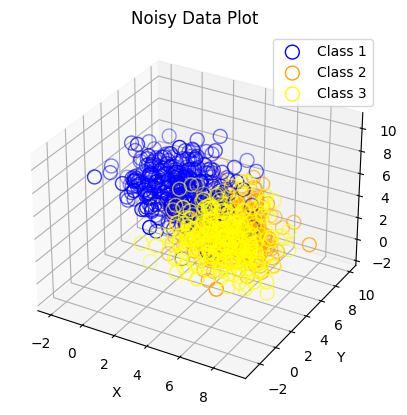

W1 shape: (3, 5)
W2 shape: (5, 3)
Weight Matrix1: 
[[ 0.00496714 -0.00138264  0.00647689  0.0152303  -0.00234153]
 [-0.00234137  0.01579213  0.00767435 -0.00469474  0.0054256 ]
 [-0.00463418 -0.0046573   0.00241962 -0.0191328  -0.01724918]]
Weight Matrix2: 
[[-0.00562288 -0.01012831  0.00314247]
 [-0.00908024 -0.01412304  0.01465649]
 [-0.00225776  0.00067528 -0.01424748]
 [-0.00544383  0.00110923 -0.01150994]
 [ 0.00375698 -0.00600639 -0.00291694]]
NN_data_csv) index = 339
Derive predictions from randomly initialized weight matrices =====> [0.33341643 0.33178551 0.33479806]
Predicted class: 3
Actual class: 2
Accuracy: 33.33%


In [7]:
# 실습 3 - "NN_data.csv" 데이터를 활용한 실습 (데이터를 3차원 평면에 표시, One-Hot Encoding 구현, 2계층 신경망 구현)

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 불러오기
data = pd.read_csv("C:/Coding/Python/machine_learning/week11/NN_data.csv")

# 열 이름 확인
print("Columns in the dataset:", data.columns)

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 포인트 플롯
colors = {1: 'blue', 2: 'orange', 3: 'yellow'}
for target in data['y'].unique():
    subset = data[data['y'] == target]
    ax.scatter(subset['x0'], subset['x1'], subset['x2'], label=f'Class {target}', marker='o', edgecolors=colors[target], facecolors='none', s=100)

# 축 레이블 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 범례 추가
ax.legend()

# 타이틀 설정
ax.set_title("Noisy Data Plot")

# 그래프 표시
plt.show()

# 클래스 중심과 크기 정의
class_size = 300
Class1_center = [2, 4, 6]
Class2_center = [4, 6, 2]
Class3_center = [6, 2, 4]

# 노이즈 추가된 데이터 생성
Class1 = np.random.normal(Class1_center, 1.2, size=(class_size, 3))
Class2 = np.random.normal(Class2_center, 1.2, size=(class_size, 3))
Class3 = np.random.normal(Class3_center, 1.2, size=(class_size, 3))

# 노이즈가 추가된 데이터를 하나의 데이터프레임으로 결합
noise_data = np.vstack([Class1, Class2, Class3])
noise_labels = np.array([1]*class_size + [2]*class_size + [3]*class_size)
noise_df = pd.DataFrame(noise_data, columns=['x0', 'x1', 'x2'])
noise_df['y'] = noise_labels

# 입력 속성 수 계산 (타겟 열 제외)
input_size = noise_df.shape[1] - 1

# 출력 클래스 수 계산
output_size = noise_df['y'].nunique()

# 히든 레이어 노드 수 설정
hidden_size = int(input("The number of Hidden Nodes: "))

# 가중치 행렬 초기화 (랜덤 초기화)
np.random.seed(42)  # 재현성을 위해 시드 설정
W1 = np.random.randn(input_size, hidden_size) * 0.01  # 입력층 -> 은닉층 가중치
W2 = np.random.randn(hidden_size, output_size) * 0.01 # 은닉층 -> 출력층 가중치

print("W1 shape:", W1.shape)
print("W2 shape:", W2.shape)

# 입력 데이터 준비 (타겟 열 제외)
X = noise_df.drop('y', axis=1).values

# One-Hot Encoding 구현
def One_Hot_Encoding(y):
    number_of_classes = len(np.unique(y))
    one_hot = np.zeros((len(y), number_of_classes))

    for k in np.arange(0,len(y)):
        for k_1 in range(0, number_of_classes+1):   
            if(y[k] == k_1):                      # y를 전체적으로 순환하여 y[k] = k_1인 경우 미리 만들어둔 One-Hot Encoding 배열의 해당 요소를 1로 변경
                one_hot[k,k_1 - 1] = 1          
                
    return one_hot, number_of_classes

# 예측 값 도출
random_index = np.random.randint(0, len(X))
input_features = X[random_index]

# Forward Propagation
hidden_layer_input = np.dot(input_features, W1)  # 은닉층 입력
hidden_layer_output = sigmoid(hidden_layer_input)  # 은닉층 출력 (활성화 함수 적용)
output_layer_input = np.dot(hidden_layer_output, W2)  # 출력층 입력
predicted_y = softmax(output_layer_input)  # 출력층 출력 (활성화 함수 적용)

print(f'Weight Matrix1: \n{W1}')
print(f'Weight Matrix2: \n{W2}')
print(f"NN_data_csv) index = {random_index}")
print(f'Derive predictions from randomly initialized weight matrices =====> {predicted_y}')

# 예측된 클래스 레이블
predicted_class = np.argmax(predicted_y) + 1  # 클래스 레이블은 1, 2, 3으로 되어있으므로 +1

# 실제 클래스 레이블
actual_class = noise_df['y'][random_index]

print(f'Predicted class: {predicted_class}')
print(f'Actual class: {actual_class}')

# 전체 데이터에 대한 예측 값 도출
Y_pred = []
for i in range(len(X)):
    input_features = X[i]
    hidden_layer_input = np.dot(input_features, W1)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W2)
    predicted_y = softmax(output_layer_input)
    Y_pred.append(predicted_y)

Y_pred_classes = np.argmax(Y_pred, axis=1) + 1

# 정확도 계산
accuracy = np.mean(Y_pred_classes == noise_df['y'])
print(f'Accuracy: {accuracy * 100:.2f}%')